# Import all the neccessary things

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt

# Load the dataset

In [4]:
X_trainPath = 'C:/Users/H P/Desktop/Archive/train'
X_testPath = 'C:/Users/H P/Desktop/Archive/test'
X_valPath = 'C:/Users/H P/Desktop/Archive/val'

image_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

ds_train = image_datagen.flow_from_directory(
    X_trainPath,
    target_size=(100, 100),  # Adjust target_size based on your model architecture
    batch_size=32,
    class_mode='binary'
)

ds_test = image_datagen.flow_from_directory(
    X_testPath,
    target_size=(100, 100),  # Adjust target_size based on your model architecture
    batch_size=32,
    class_mode='binary'
)

ds_val = image_datagen.flow_from_directory(
    X_valPath,
    target_size=(100, 100),  # Adjust target_size based on your model architecture
    batch_size=32,
    class_mode='binary'
)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


# Print some images with their level


Class Indices:
{'NORMAL': 0, 'PNEUMONIA': 1}

Actual Class Labels:
['PNEUMONIA', 'PNEUMONIA', 'NORMAL', 'NORMAL', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'NORMAL', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'NORMAL', 'NORMAL', 'PNEUMONIA', 'NORMAL', 'NORMAL', 'PNEUMONIA', 'PNEUMONIA']


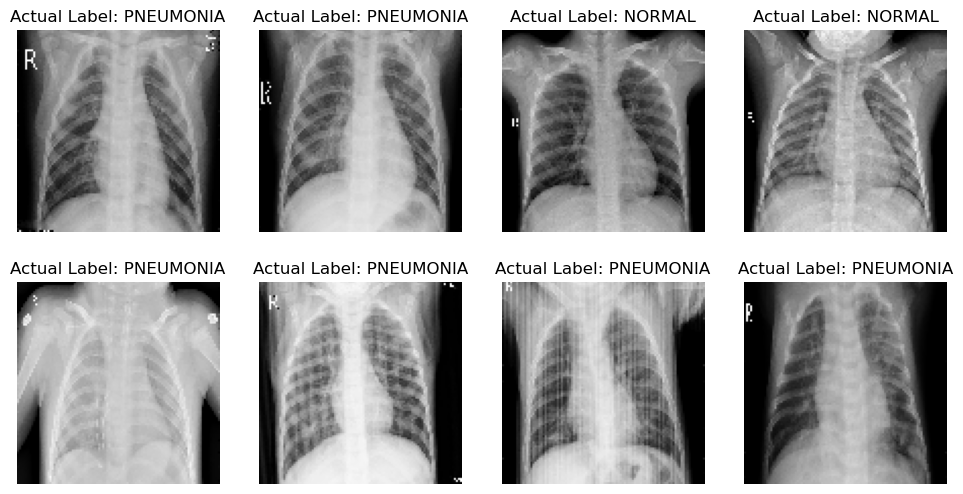

In [6]:
batch_images, batch_label = next(ds_train)

class_indices = ds_train.class_indices
print("\nClass Indices:")
print(class_indices)
actual_labels = [list(class_indices.keys())[list(class_indices.values()).index(label)] for label in batch_label]
print("\nActual Class Labels:")
print(actual_labels)
plt.figure(figsize=(12, 6))
for i in range(8):
    plt.subplot(2, 4, i+1)
    plt.imshow(batch_images[i])
    plt.title(f"Actual Label: {actual_labels[i]}")
    plt.axis('off')

plt.show()

# Creating model

In [7]:
myModel = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D((2, 2)),
    
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

myModel.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 49, 49, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 23, 23, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 16928)             0         
                                                                 
 dense (Dense)               (None, 64)               

# Compile the model

In [8]:
myModel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Using fit function

In [9]:
history = myModel.fit(ds_train, validation_data=ds_val, epochs=5, verbose=1)

Epoch 1/5


163/163 [==============================] - 79s 475ms/step - loss: 0.2563 - accuracy: 0.8917 - val_loss: 0.9172 - val_accuracy: 0.6875
Epoch 2/5
163/163 [==============================] - 80s 491ms/step - loss: 0.1206 - accuracy: 0.9538 - val_loss: 0.2102 - val_accuracy: 0.9375
Epoch 3/5
163/163 [==============================] - 77s 472ms/step - loss: 0.0864 - accuracy: 0.9691 - val_loss: 0.5081 - val_accuracy: 0.6875
Epoch 4/5
163/163 [==============================] - 78s 479ms/step - loss: 0.0783 - accuracy: 0.9672 - val_loss: 0.1235 - val_accuracy: 0.9375
Epoch 5/5
163/163 [==============================] - 78s 478ms/step - loss: 0.0667 - accuracy: 0.9755 - val_loss: 0.2454 - val_accuracy: 0.8125


# Evaluate with test data

In [10]:
result = myModel.evaluate(ds_test)
print("test loss : ",result[0])
print("test accuracy : ",result[1])

20/20 [==============================] - 8s 390ms/step - loss: 1.2904 - accuracy: 0.7404
test loss :  1.2903592586517334
test accuracy :  0.7403846383094788
